In [25]:
import pandas as pd
import numpy as np

In [26]:
dataset=pd.read_csv("labeled_data.csv")

In [27]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [28]:
dataset['label']=dataset['class'].map({0:'HATE SPEECH',1:'OFFENSIVE LANGUAGE',2:'NO HATE OR OFFENSIVE'})

In [29]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,label
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,NO HATE OR OFFENSIVE
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,OFFENSIVE LANGUAGE
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,OFFENSIVE LANGUAGE
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,OFFENSIVE LANGUAGE
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,OFFENSIVE LANGUAGE
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,OFFENSIVE LANGUAGE
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",NO HATE OR OFFENSIVE
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,OFFENSIVE LANGUAGE
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,OFFENSIVE LANGUAGE


In [30]:
data=dataset[["label","tweet"]]

In [31]:
data
data.head()

,label,tweet
0,NO HATE OR OFFENSIVE,!!! RT @mayasolovely: As a woman you shouldn't...
1,OFFENSIVE LANGUAGE,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,OFFENSIVE LANGUAGE,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,OFFENSIVE LANGUAGE,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,OFFENSIVE LANGUAGE,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [32]:
import re
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:

from nltk.corpus import stopwords
stopwords=set(stopwords.words("english"))

In [34]:
stemmer = nltk.SnowballStemmer("english")

In [38]:
def clean(text):
    text = str(text).lower()
    text = re.sub('.*?', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [39]:
data['tweet']=data['tweet'].apply(clean)

C:\Users\kadam\AppData\Local\Temp\ipykernel_11016\839418588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].apply(clean)


In [40]:
data

,label,tweet
0,NO HATE OR OFFENSIVE,
1,OFFENSIVE LANGUAGE,
2,OFFENSIVE LANGUAGE,
3,OFFENSIVE LANGUAGE,
4,OFFENSIVE LANGUAGE,
...,...,...
24778,OFFENSIVE LANGUAGE,
24779,NO HATE OR OFFENSIVE,
24780,OFFENSIVE LANGUAGE,
24781,OFFENSIVE LANGUAGE,


In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

In [101]:
x= np.array(data["tweet"])
y = np.array(data["label"])

In [18]:
cv=CountVectorizer()
X=cv.fit_transform(x)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=dt.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 120,   50,  295],
       [  25, 1204,  150],
       [ 203,  169, 5963]])

<Axes: >

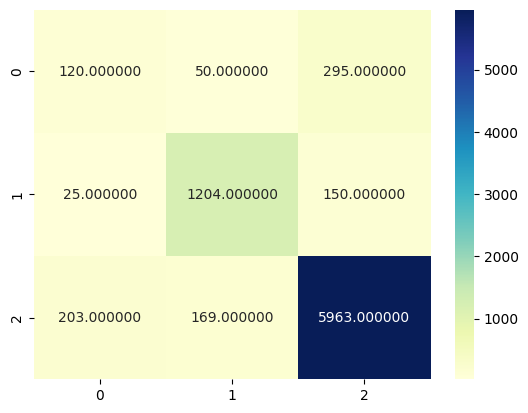

In [22]:
sns.heatmap(cm,annot=True,fmt="f",cmap="YlGnBu")

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = dt.predict(data)
print(output)
